In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt 
from datetime import date
import scipy.stats as sps

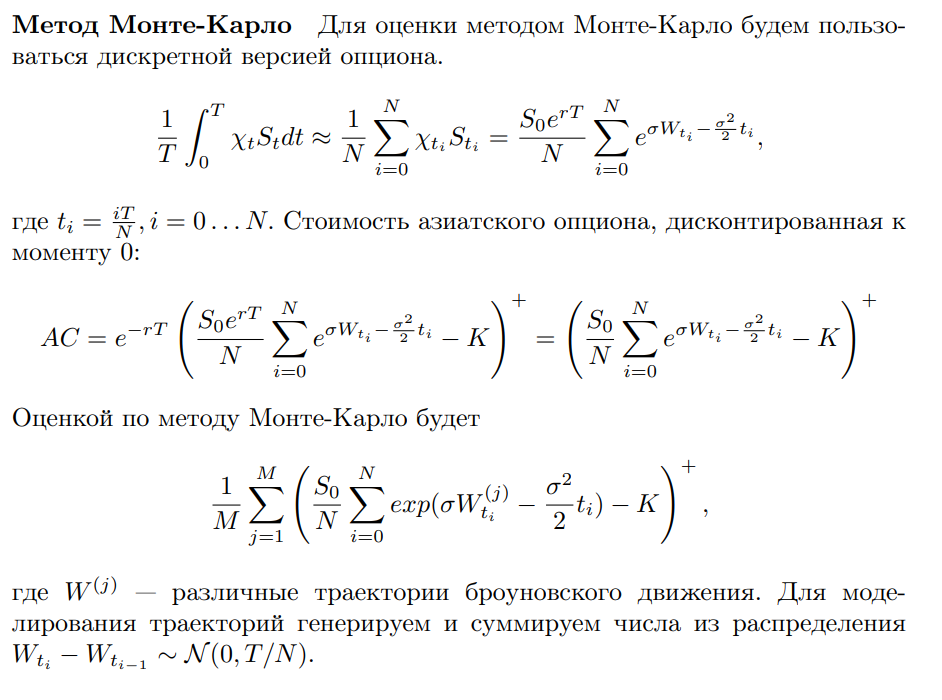

In [6]:
def getConfidenceInterval(optionPrices, confidence):
    return sps.t.interval(
        confidence, 
        len(optionPrices)-1, 
        loc=np.mean(optionPrices), 
        scale=sps.sem(optionPrices)
    )

def generatePaths(pathsNumber, stepsNumber, dt):
    return sps.norm.rvs(0, dt**0.5, size=(stepsNumber, pathsNumber))

def getLogForwardIncrements(alpha, sigma_1, sigma_2, dt, dW_1, dW_2):
    times = np.ones(dW_1.shape).cumsum(axis=1) * dt
    return sigma_1 * np.exp(-alpha * times) * dW_1 \
    + sigma_2 *(1 - np.exp(-alpha * times)) * dW_2

def getForwardPrices(pathsNumber, stepsNumber, alpha, sigma_1, sigma_2, tenor):
    dt = tenor / stepsNumber
    dW_1 = generatePaths(pathsNumber, stepsNumber, dt) 
    dW_2 = generatePaths(pathsNumber, stepsNumber, dt) 
    dLogF = getLogForwardIncrements(alpha, sigma_1, sigma_2, dt, dW_1, dW_2)
    LogF = dLogF.cumsum(axis=0) + np.log(S_0)
    return np.exp(LogF)

def getAveragePrice(
    pathsNumber, stepsNumber, S_0, alpha, sigma_1, sigma_2, tenor
):
    F = getForwardPrices(pathsNumber, stepsNumber, alpha, sigma_1, sigma_2, tenor)
    weight = S_0 / stepsNumber / F[-1]
    return (weight * F).sum(axis=0)

def getPutIntrinsicValue(averagePrice, K):
    return K - averagePrice

def getCallIntrinsicValue(averagePrice, K):
    return averagePrice - K

def getOptionPayoff(intrinsicValue):
    return np.maximum(intrinsicValue, 0)

def getOptionPrice(
    pathsNumber, stepsNumber, S_0, K, alpha, sigma_1, sigma_2, tenor
):
    averagePrice = getAveragePrice(
        pathsNumber, stepsNumber, S_0, alpha, sigma_1, sigma_2, tenor
    )
    putIntrinsicValue = getPutIntrinsicValue(averagePrice, K)
    return getOptionPayoff(putIntrinsicValue)

def getMonteCarloOptionPrice(
    pathsNumber, stepsNumber, S_0, K, alpha, sigma_1, sigma_2, tenor, confidence
):
    putPrices = getOptionPrice(
        pathsNumber, stepsNumber, S_0, K, alpha, sigma_1, sigma_2, tenor
    )
    return putPrices.mean(), getConfidenceInterval(putPrices, confidence)

                                                   
                                                   
                                                   
                                                   
def plotPriceIteration(
    stepsNumber, S_0, K, alpha, sigma_1, sigma_2, tenor, 
    confidence, iterationStep, maxIterationNumber, aproximationPrice=None
):
    iterationsNumbers = np.arange(0, maxIterationNumber + iterationStep, iterationStep)[1:]
    putPrices = []
    lowerBounds = []
    upperBounds = []
                                                   
    for iterationsNumber in iterationsNumbers:
        price, interval = getMonteCarloOptionPrice(
                iterationsNumber, stepsNumber, S_0, K, alpha, sigma_1, sigma_2, tenor, confidence
        )                                           
        putPrices.append(price)
        lowerBounds.append(interval[0])
        upperBounds.append(interval[1])
    
    plt.figure(figsize=(14, 8))
    plt.plot(iterationsNumbers, putPrices)
    plt.plot(iterationsNumbers, lowerBounds)
    plt.plot(iterationsNumbers, upperBounds)
    
    if aproximationPrice:
        plt.axhline(y=aproximationPrice, color='black')#, linestyle='--', linewidth=5)
        
    plt.title('Asian put option price over path number in Monte Carlo')
    plt.xlabel('Paths number')
    plt.ylabel('Put price')

def plotPriceStrike(pathsNumber, stepsNumber, S_0, alpha, sigma_1, sigma_2, tenor, aproximationPrice):
    pass

def plotPaths(pathsNumber, stepsNumber, tenor, strike=None):
    paths = getForwardPrices(pathsNumber, stepsNumber, alpha, sigma_1, sigma_2, tenor)
    plt.figure(figsize=(14, 8))
    plt.plot(range(stepsNumber), paths)
    
    if strike:
        plt.axhline(y=strike, color='black', linestyle='--', linewidth=5)
        
    plt.title('Stock paths')
    plt.xlabel('Step')
    plt.ylabel('Stock value')


In [3]:
sigma_1 = 0.01
sigma_2 = 0.05
alpha = 0.02
S_0 = 76.9
K = 80
tenor = 3

pathsNumber = 10**4
stepsNumber = 100

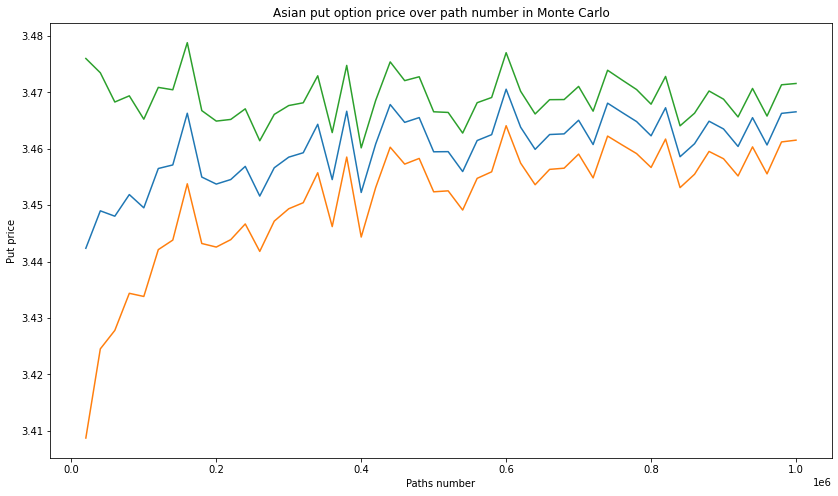

In [243]:
stepsNumber = 100
iterationStep = 2 * 10**4
maxIterationNumber = 10**6
approximationPrice = 3.45
confidence = 0.9

plotPriceIteration(
    stepsNumber, S_0,  K, alpha, sigma_1, sigma_2, tenor, confidence, iterationStep, maxIterationNumber
)

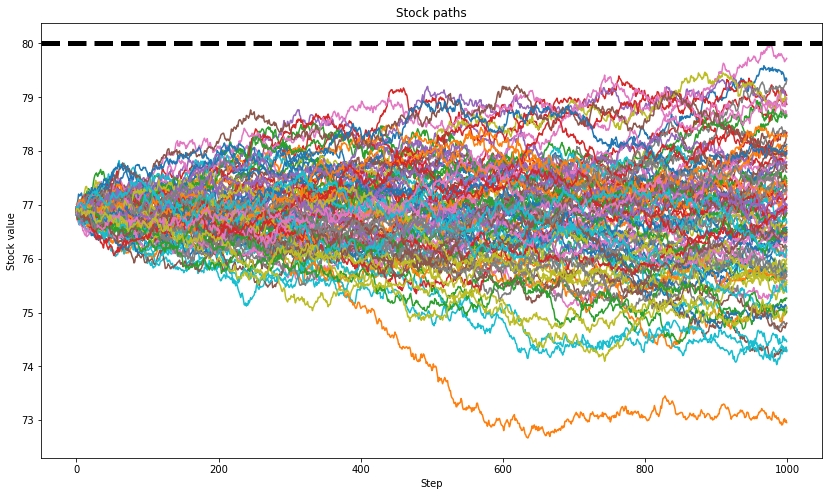

In [226]:
plotPaths(100, 1000, 3, K)

In [236]:
iterationsNumbers = np.arange(0, maxIterationNumber + iterationStep, iterationStep)[1:]
putPrices = []
lowerBounds = []
upperBounds = []

for iterationsNumber in iterationsNumbers:
    price, interval = getMonteCarloOptionPrice(
            iterationsNumber, stepsNumber, S_0, K, alpha, sigma_1, sigma_2, tenor, confidence
    )                                           
    putPrices.append(price)
    lowerBounds.append(interval[0])
    upperBounds.append(interval[1])

In [237]:
iterationsNumbers

array([1000000])

(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 1.300e+01,
        1.700e+01, 3.500e+01, 3.900e+01, 8.800e+01, 1.450e+02, 2.030e+02,
        3.560e+02, 5.120e+02, 7.860e+02, 1.037e+03, 1.483e+03, 1.971e+03,
        2.547e+03, 3.239e+03, 3.929e+03, 4.631e+03, 5.372e+03, 6.015e+03,
        6.615e+03, 6.848e+03, 7.095e+03, 7.162e+03, 6.492e+03, 6.156e+03,
        5.615e+03, 4.937e+03, 4.262e+03, 3.373e+03, 2.540e+03, 2.035e+03,
        1.422e+03, 1.063e+03, 7.200e+02, 4.560e+02, 3.260e+02, 2.020e+02,
        1.230e+02, 5.900e+01, 3.700e+01, 1.900e+01, 1.200e+01, 5.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.10016284, 0.27104888, 0.44193491, 0.61282094, 0.78370698,
        0.95459301, 1.12547905, 1.29636508, 1.46725111, 1.63813715,
        1.80902318, 1.97990922, 2.15079525, 2.32168128, 2.49256732,
        2.66345335, 2.83433939, 3.00522542, 3.17611145, 3.34699749,
        3.51788352, 3.68876956, 3.85965559, 4.03054162, 4.20142766,
        4.37231369, 4.54319973, 4.71

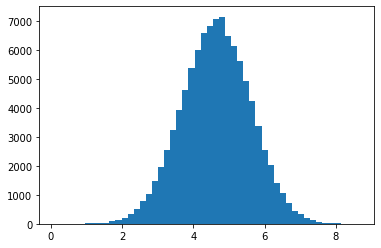

In [168]:
plt.hist(prices, bins=50)

In [167]:
iterations = 10**5
confidence = 0.9
prices = getOptionPrice(
    iterations, stepsNumber, S_0, K, alpha, sigma_1, sigma_2, tenor
)
price = prices.mean()
price

4.633009237747072

In [165]:
sps.t.interval(confidence, len(prices)-1, loc=np.mean(prices), scale=sps.sem(prices))

(5.463960802564344, 5.4738698643303785)

In [122]:
price_std = np.std(prices) / np.sqrt(iterations)       # standard deviation of the price estimator
h = sps.norm.ppf((1 + confidence) / 2)*price_std
lo = price - h   # lower bound of confidence interval for the price
hi = price + h
lo, hi

(2.528356488194234, 2.5386208792970075)

In [123]:
standart_error = sps.sem(prices)
h = standart_error * sps.t.ppf((1 + confidence) / 2., iterations-1)
lo = price - h
hi = price + h
lo, hi

(2.5283564149879734, 2.538620952503268)